# Logistic Regression

출처: https://github.com/Harry24k/Pytorch-Basic

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

import numpy as np
from sklearn import datasets

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Prepare Data


Data Set Information:

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

Predicted attribute: class of iris plant. 

This is an exceedingly simple domain. 

This data differs from the data presented in Fishers article (identified by Steve Chadwick, spchadwick '@' espeedaz.net ). The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" where the error is in the fourth feature. The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa" where the errors are in the second and third features.


Attribute Information:

1. sepal(꽃받침) length in cm 
2. sepal(꽃받침) width in cm 
3. petal(꽃잎) length in cm 
4. petal(꽃잎) width in cm 
5. class: 
-- Iris Setosa (부채붓꽃)
-- Iris Versicolour (...) 
-- Iris Virginica (...)

In [3]:
iris = datasets.load_iris()

#sepal length in cm, sepal width in cm
X = iris.data[:, :2]

#-- Iris Setosa v.s. -- Iris Versicolour-- Iris Virginica

def f(x) :
    if x < 1 :
        return 0
    else :
        return 1
    
Y = np.array(list(map(f, iris.target)))

In [10]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [11]:
len(Y)

150

In [14]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

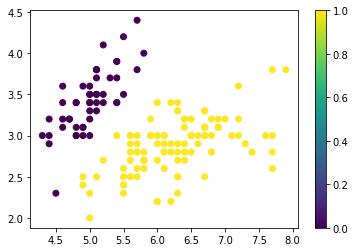

In [4]:
plt.scatter(X[:, 0], X[:, 1], c = Y)
plt.colorbar()
plt.show()

## 2. Define Model

In [5]:
x, y = torch.from_numpy(X).float(), torch.from_numpy(Y).float()

In [16]:
# input tensor size is important (data 수, feature size)
x.size()

torch.Size([150, 2])

In [17]:
y.size()

torch.Size([150])

In [6]:
linear = nn.Linear(2, 1, bias = True)
sigmoid = nn.Sigmoid()

model = nn.Sequential(linear, sigmoid)

In [7]:
#Binary Cross Entropy Loss : class가 2개일 때
loss = nn.BCELoss() # error often used in binary classification (0,1 분류)
optimizer = optim.SGD(model.parameters(), lr=0.01)

## 3. Train Model

In [8]:
for step in range(2000): # epoch: 2000
    prob = model(x)
    cost = loss(prob, y.view(150, 1))
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if step % 200 == 0 :
        print("Step : ",step, ", Cost : ", cost.item())

Step :  0 , Cost :  0.9289963841438293
Step :  200 , Cost :  0.5343300104141235
Step :  400 , Cost :  0.45827600359916687
Step :  600 , Cost :  0.40041762590408325
Step :  800 , Cost :  0.3556453585624695
Step :  1000 , Cost :  0.3203109800815582
Step :  1200 , Cost :  0.2918771803379059
Step :  1400 , Cost :  0.2685810923576355
Step :  1600 , Cost :  0.24918387830257416
Step :  1800 , Cost :  0.23280075192451477


## 4. Test Model

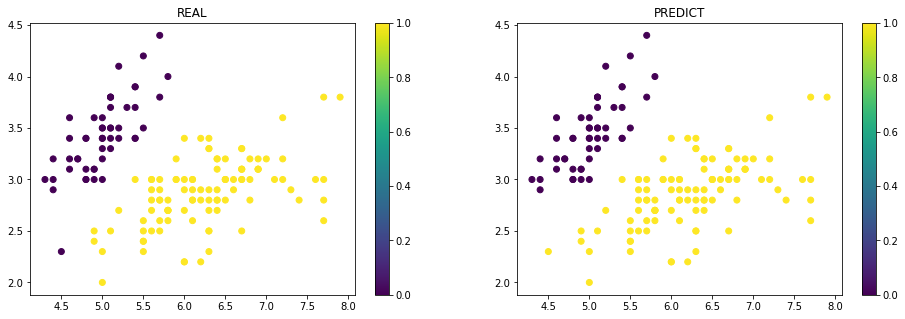

In [9]:
fig = plt.figure(figsize = (16, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

z1_plot = ax1.scatter(X[:, 0], X[:, 1], c = Y) # label, the real answer
z2_plot = ax2.scatter(X[:, 0], X[:, 1], c = model(x).squeeze().data.numpy() > 0.5) # what we predicted
# model(x)는 0과 1 사이의 값을 가지는데, squeeze는 (150,1) 이면 150으로 차원이 1인 애들을 다 없애줌.
# squeeze changes a tensor into a scalar, check cell below
# c: color

plt.colorbar(z1_plot,ax=ax1)
plt.colorbar(z2_plot,ax=ax2)

ax1.set_title("REAL")
ax2.set_title("PREDICT")

plt.show()

In [20]:
model(x).squeeze().data.numpy() > 0.5

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,